<center><u> <h1>NLP Assignment 2: Converting Words into Vectors (Basics techniques)</h1></u></center>

---
<b>Welcome to NLP Assignment-2!!</b><br>
Topics covered to this assignment:

1.   Bag of Words[BOW]
3.   Tf-IDF
4.   N-Grams
5.   Part of speech[POS]


---


# Bag of words
The bag-of-words model is a simplifying representation used in natural language processing and information retrieval. In this model, a text (such as a sentence or a document) is represented as the bag of its words, disregarding grammar and even word order but keeping multiplicity.

The bag-of-words model is commonly used in methods of document classification where the occurrence of each word is used as a feature for training a classifier.


The Bag-of-words model is one example of a Vector space model.

![image.png](https://excelrcom.b-cdn.net/assets/admin/ckfinder/userfiles/images/2020%20uploads/12/3.PNG)


### CountVectorizer
CountVectorizer is a great tool provided by the scikit-learn library in Python. It is used to transform a given text into a vector on the basis of the frequency of each word that occurs in the entire text.

It creates a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix.

![image266.png](https://res.cloudinary.com/practicaldev/image/fetch/s--qveZ_g7d--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://raw.githubusercontent.com/cassieview/intro-nlp-wine-reviews/master/imgs/vectorchart.PNG)


Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

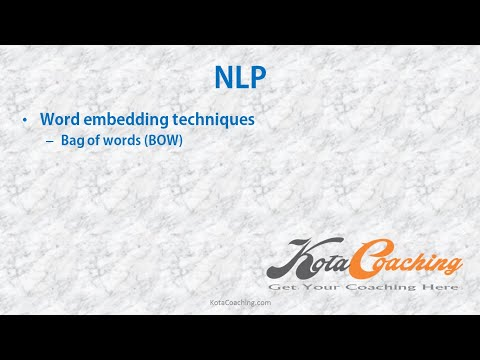

In [ ]:
##### Refer Video
from IPython.display import YouTubeVideo
YouTubeVideo('L_v79r8Yqqs', width=600, height=300)

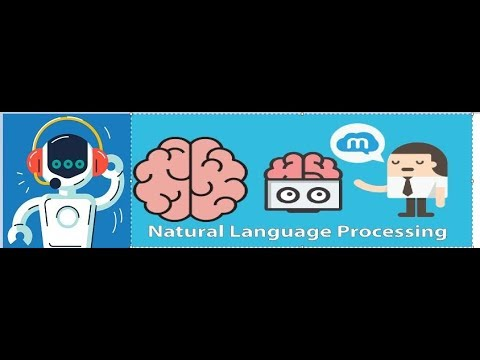

In [ ]:
##### Refer Video
YouTubeVideo('iu2-G_5YkEo', width=600, height=300)

For **BOW**, we will import the libraries for preprocessing the data such as tokenization,Stemming and stop words.<br>
We will use download function as we have performed in assignment 1

In [1]:
#importing  nltk library and download punkt and stopwords
#import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True


As we can see that all required packages have been downloaded.
Hence we can import the libraries such as stop words and portstemmer.

In [2]:
#importing libraries re , stopwords and porterstemmer
#import re [for regular expression]
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


Run the below cell for taking input.
By default we have given the input if you want you change the input as per your choice :)

In [3]:
paragraph =  """Natural language processing (NLP) refers to the branch of computer science—and more specifically, the branch of artificial intelligence or AI—concerned with giving computers the ability to understand text and spoken words in much the same way human beings can.
NLP combines computational linguistics—rule-based modeling of human language—with statistical, machine learning, and deep learning models. Together, these technologies enable computers to process human language in the form of text or voice data and to ‘understand’ its full meaning, complete with the speaker or writer’s intent and sentiment.
NLP drives computer programs that translate text from one language to another, respond to spoken commands, and summarize large volumes of text rapidly—even in real time. There’s a good chance you’ve interacted with NLP in the form of voice-operated GPS systems, digital assistants, speech-to-text dictation software, customer service chatbots, and other consumer conveniences. But NLP also plays a growing role in enterprise solutions that help streamline business operations, increase employee productivity, and simplify mission-critical business processes."""

In the next cell,<br>

1.   ps(any name can be chosen) object of the PorterStemmer class is created as object is an instance of the class that can implement all the methods and functionalities of the class.


In [4]:
#creating object of ps
ps=PorterStemmer()

In [5]:
# Tokenizing sentences(the paragraph is converted into sentences)
sentences=nltk.sent_tokenize(paragraph)
# sent_tokenize method from the nltk library is used to tokenize sentences
sentences[0]

'Natural language processing (NLP) refers to the branch of computer science—and more specifically, the branch of artificial intelligence or AI—concerned with giving computers the ability to understand text and spoken words in much the same way human beings can.'

The output sentence has been tokenized with sent_tokenize technique and hence we have print the first value[0].


For next cell,<br>
All the tokenized senetences are processed using a for loop. Other characters excluding 'a-zA-Z' are substituted with a whitespace. Next all the senetences are converted into lowercase using the lower method of the strings class. The lowercase sentences are then splitted based on whitespaces using the split method of the strings class. Ahead the splitted words are checked for stopwords. If the words are not stopwords then they are stemmed using the stem method from the PorterStemmer class. All these stemmed words are joined using whitespaces and appended in a list.
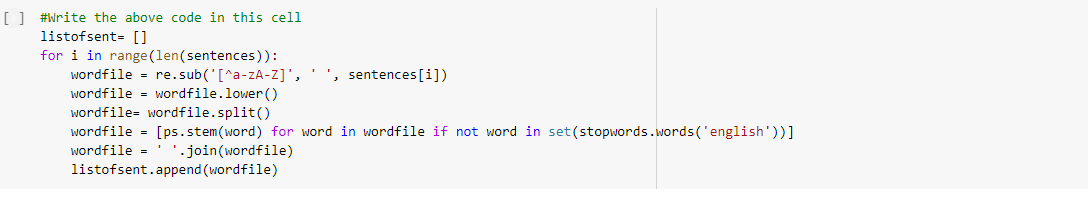


Copy this code as it in below cell.

In [6]:
#Write the above code in this cell
listofsent=[]
for i in range(len(sentences)):
  wordfile=re.sub('[^a-zA-Z]',' ',sentences[i])
  wordfile=wordfile.lower()
  wordfile=wordfile.split()
  wordfile=[ps.stem(word) for word in wordfile if not word in set(stopwords.words('english'))]
  wordfile=' '.join(wordfile)
  listofsent.append(wordfile)


In the next cell,<br>CountVectorizer class is used to get the count of each word in the processed sentences.

In [7]:
# Creating the Bag of Words model using countVectorizer
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer


In [8]:
#Creating object of CountVectorizer
cv=CountVectorizer()

# We will using fit_transform() for fitting our data into it.
X=cv.fit_transform(listofsent)
#for print X value we wil convert it into to array by using toarray method()
X=X.toarray()

In [9]:
#printing first value of X[0]
print(X[0])

[1 1 0 0 1 0 0 1 2 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0]


As we can see that the output has been converted into vectors.
You can play with our inputs and changing the X value to see the outputs for others sentences :)

# TF-IDF

TF-IDF stands “Term Frequency — Inverse Document Frequency”. <br>
This is a technique to quantify words in a set of documents. We generally compute a score for each word to signify its importance in the document and corpus. This method is a widely used technique in Information Retrieval and Text Mining.

![Image.jpg](https://www.tmblast.com/wp-content/uploads/2018/11/TF-IDF-Report-from-Moz.jpg)



Documentation:https://en.wikipedia.org/wiki/Tf%E2%80%93idf


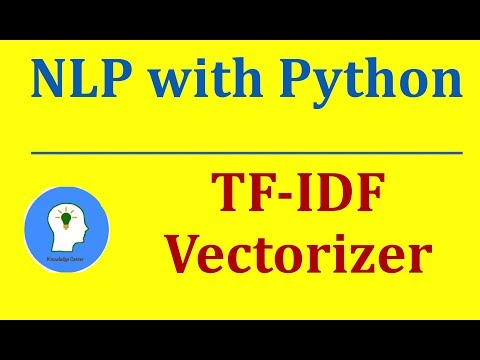

In [ ]:
##### Refer Video
YouTubeVideo('ZeQgNhc0vag', width=600, height=300)

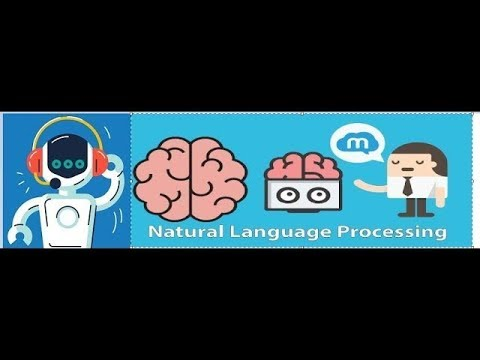

In [ ]:
##### Refer Video
YouTubeVideo('z9myrLOF_1M', width=600, height=300)

For TD-IDF, we will import the libraries for preprocessing the data such as tokenization,Lemmatization and stop words.

We will use download function as we have performed in assignment 1.

In [10]:
#importing  nltk library and download punkt and stopwords
#import nltk
#nltk.download('punkt')
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True


As we can see that all required packages have been downloaded.
Hence we can import the libraries such as stop words and WordNetLemmatizer

In [11]:
#importing libraries re , stopwords and WordNetLemmatizer
#import re [for regular expression]
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In the next cell,<br>
1. ps1(any name can be chosen) object of the PorterStemmer class and wordnet1 object of the WordNetLemmatizer class are created as object is an instance of the class that can implement all the methods and functionalities of the class.
2. The paragraph is converted into sentences and sent_tokenize method from the nltk library is used to tokenize sentences.

In [12]:
#creating object of lemmatization.
wordnet1=WordNetLemmatizer()
#tokenzing the input into tokenized sentences
sentences1=nltk.sent_tokenize(paragraph)
#Creating list
listofsent2=[]

For next cell,
All the tokenized senetences are processed using a for loop. Other characters excluding 'a-zA-Z' are substituted with a whitespace. Next all the senetences are converted into lowercase using the lower method of the strings class. The lowercase sentences are then splitted based on whitespaces using the split method of the strings class. Ahead the splitted words are checked for stopwords. If the words are not stopwords then they are stemmed using the stem method from the PorterStemmer class. All these stemmed words are joined using whitespaces and appended in a list.

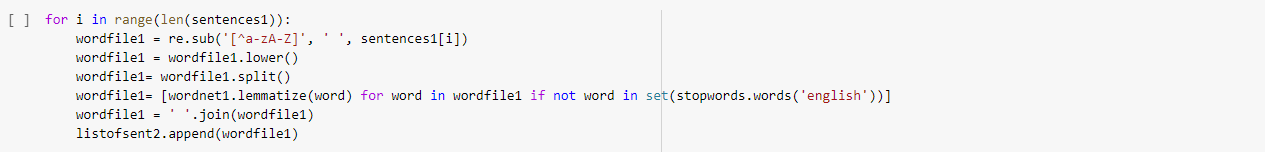

Copy this code into below cell for preprocessing the data.


In [13]:
#write the above mentioned code.
for i in range(len(sentences)):
  wordfile1=re.sub('[^a-zA-Z]',' ',sentences1[i])
  wordfile1=wordfile1.lower()
  wordfile1=wordfile1.split()
  wordfile1=[wordnet1.lemmatize(word) for word in wordfile1 if not word in set(stopwords.words('english'))]
  wordfile1=' '.join(wordfile1)
  listofsent2.append(wordfile1)

In the next cell, TfidVectorizer is imported to vectorize words based on document weightage. cv object of the TfidVectorizer class is created as object is an instance of the class that can implement all the methods and functionalities of the class. Above processed text is then vectorized using the fit_transform method.

In [14]:
# Creating the TF-IDF model.
# Importing TfidfVectorizer from sklearn .
#from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# creating object of TfidfVectorizer.
cv=TfidfVectorizer()
# We will using fit_transform() for fitting our data into it.
X=cv.fit_transform(listofsent2).toarray()


As we can see that we have fit and transform the data into X.
Now we can check the sentences by the changing the value or playing with inputs :)

In [15]:
#print first value of X
print(X[0])

[0.20537856 0.20537856 0.         0.         0.20537856 0.
 0.         0.20537856 0.41075711 0.         0.         0.
 0.         0.         0.         0.         0.28437225 0.20537856
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.20537856 0.         0.
 0.         0.         0.14218613 0.         0.20537856 0.
 0.         0.12184271 0.         0.         0.         0.
 0.         0.         0.         0.         0.20537856 0.20537856
 0.10522092 0.         0.         0.         0.         0.
 0.20537856 0.         0.         0.         0.         0.20537856
 0.         0.         0.         0.20537856 0.         0.
 0.         0.         0.         0.         0.20537856 0.
 0.16841335 0.         0.         0.         0.         0.
 0.12184271 0.         0.         0.         0.16841335 0.
 0.         0.20537856 0.20537856 0.        ]


As per the output we can see that words have converted into vectors.    -_-
---

# N-Grams
N-grams of texts are extensively used in text mining and natural language processing tasks. They are basically a set of co-occurring words within a given window and when computing the n-grams you typically move one word forward.

![Image.png](https://www.tutorialexample.com/wp-content/uploads/2019/09/python-sentence-n-grams-model.png)

Documtation: https://en.wikipedia.org/wiki/N-gram

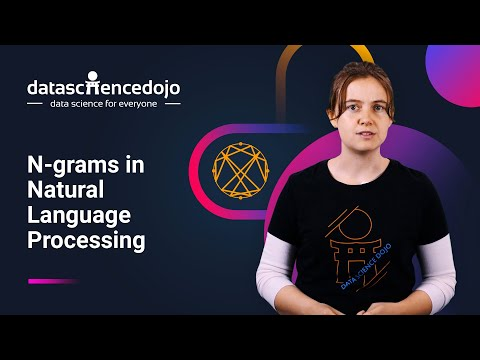

In [ ]:
YouTubeVideo('E_mN90TYnlg', width=600, height=300)


Here we will importing the ngrams package from Nltk library for making unigrams,bigrams,trigrams etc.

In [16]:
# NLTK function to generate ngrams
#import nltk
#from nltk.util import ngrams
import nltk
from nltk.util import ngrams
samplText='CloudyMl is an EduTech Company'


For Unigram, we will give n=1

In [17]:
#we will use ngrams function from nltk
#NGRAMS=ngrams(sequence=nltk.word_tokenize(samplText), n=1)
NGRAMS=ngrams(sequence=nltk.word_tokenize(samplText), n=1)

#usning for loop for printing the values.
for grams in NGRAMS:
  print(grams)

('CloudyMl',)
('is',)
('an',)
('EduTech',)
('Company',)


For Bigram, we will give n=2

In [18]:
#we will use ngrams function from nltk
#NGRAMS=ngrams(sequence=nltk.word_tokenize(samplText), n=2)
NGRAMS=ngrams(sequence=nltk.word_tokenize(samplText), n=2)
#usning for loop for printing the values.
for grams in NGRAMS:
  print(grams)

('CloudyMl', 'is')
('is', 'an')
('an', 'EduTech')
('EduTech', 'Company')



For Trigram, we will give n=3

In [19]:
#we will use ngrams function from nltk
#NGRAMS=ngrams(sequence=nltk.word_tokenize(samplText), n=3)
NGRAMS=ngrams(sequence=nltk.word_tokenize(samplText), n=3)
#usning for loop for printing the values.
for grams in NGRAMS:
  print(grams)

('CloudyMl', 'is', 'an')
('is', 'an', 'EduTech')
('an', 'EduTech', 'Company')


#Parts of speech(POS)
It is a process of converting a sentence to forms – list of words, list of tuples (where each tuple is having a form (word, tag)). The tag in case of is a part-of-speech tag, and signifies whether the word is a noun, adjective, verb, and so on.

![image.jpg](https://www.researchgate.net/publication/337460636/figure/fig1/AS:828223747284992@1574475337385/Example-of-part-of-speech-POS-tagging-and-lemmatization-for-two-example-sentences-The.ppm)


Documentation:https://www.nltk.org/book/ch05.html

In [ ]:
YouTubeVideo('EU18BuTvKmA?t=357', width=600, height=300)

In [ ]:
# Parts of Speech.
# Universal Part-of-Speech Tagset
# Tag|Meaning|English Examples
# ADJ|adjective|new, good, high, special, big, local
# ADP|adposition|on, of, at, with, by, into, under
# ADV|adverb|really, already, still, early, now
# CONJ|conjunction|and, or, but, if, while, although
# DET|determiner, article|the, a, some, most, every, no, which
# NOUN|noun|year, home, costs, time, Africa
# NUM|numeral|twenty-four, fourth, 1991, 14:24
# PRT|particle|at, on, out, over per, that, up, with
# PRON|pronoun|he, their, her, its, my, I, us
# VERB|verb|is, say, told, given, playing, would
# .|punctuation marks|. , ; !

In [20]:
text = 'My name is CloudyML. I would to become a Data Scientist.'


Here in POS, First we can have to import nltk and word tokenization for further processing.

In [21]:
# Importing Packages
import nltk
from nltk.tokenize import word_tokenize

In [22]:
#We have to download averaged_perceptron_tagger and universal_tagset required for POS
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

In [23]:
#Word Tokenization
words=word_tokenize(text)

Here we are using **pos_tag** and tagset=universial for finding POS

In [24]:
# POS Tagging
#tagged_words = nltk.pos_tag(words, tagset = 'universal')
tagged_words = nltk.pos_tag(words, tagset = 'universal')

In [25]:
#print tagged words
print(tagged_words)

[('My', 'PRON'), ('name', 'NOUN'), ('is', 'VERB'), ('CloudyML', 'NOUN'), ('.', '.'), ('I', 'PRON'), ('would', 'VERB'), ('to', 'PRT'), ('become', 'VERB'), ('a', 'DET'), ('Data', 'NOUN'), ('Scientist', 'NOUN'), ('.', '.')]


As we can see that output is printed with their grammers.<br>

Now you try with your inputs and play with it :)

As we have covered basic techniques of word embedding. Now you will be able to convert the words into vectors by BOW, TD-IDF and other basic techniques.

Great job!!
You have come to the end of this assignment. <br>
Treat yourself for this :))

Do Fill the feedback form !!
[Feedback Form link](https://forms.zohopublic.in/cloudyml/form/CloudyMLDeepLearningFeedbackForm/formperma/VCFbldnXAnbcgAIl0lWv2blgHdSldheO4RfktMdgK7s)
<br>
You may head on to the next assignment.


![](https://us.123rf.com/450wm/doloves/doloves1708/doloves170800032/84556954-successful-businessman-celebrating-success-happy-winner-businessperson-holding-in-the-raised-hand-of.jpg?ver=6)